In [20]:
import ipyparallel
import hddm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(hddm.__version__)

0.8.0


## Load the data

In [27]:
data = hddm.load_csv('~/OneDrive/projects/mood_management/data/summer/summer_hddm_uncleaned.csv')
data.head(10)

,Unnamed: 0,subj_idx,stim,rt,response
0,1,0,0V0A,2.3108,1
1,2,0,0V0A,6.3757,1
2,3,0,0V0A,2.8626,0
3,4,0,0V0A,2.6781,0
4,5,0,0V0A,1.2570,0
5,6,0,0V0A,1.8762,0
6,7,0,0V0A,1.1894,0
7,8,0,0V0A,3.3468,1
8,9,0,0V0A,4.1201,0
9,10,0,0V0A,3.3398,0


### fitting data

In [28]:
data = hddm.utils.flip_errors(data)
m = hddm.HDDM(data, depends_on={'v': 'stim',
                                                    'a': 'stim',
                                                    't': 'stim'}, p_outlier=.05)
m.find_starting_values()
m.sample(10000, burn=1000)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 10001 of 10000 complete in 48978.9 sec

Plotting a(0V0A)
Plotting a(0V1A)
Plotting a(1V0A)
Plotting a(1V1A)
Plotting a(1Vne1A)
Plotting v(0V0A)
Plotting v(0V1A)
Plotting v(1V0A)
Plotting v(1V1A)
Plotting v(1Vne1A)
Plotting t(0V0A)
Plotting t(0V1A)
Plotting t(1V0A)
Plotting t(1V1A)
Plotting t(1Vne1A)


Text(0.5, 1.0, 'Posterior of drift-rate group means')

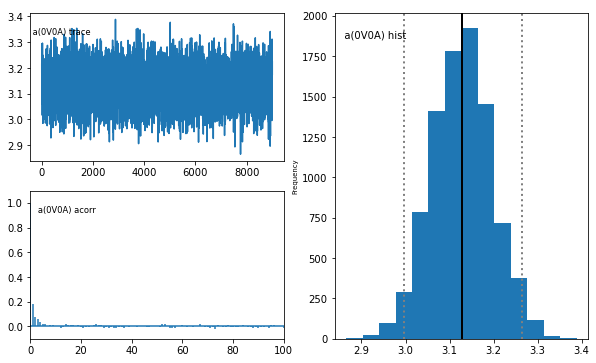

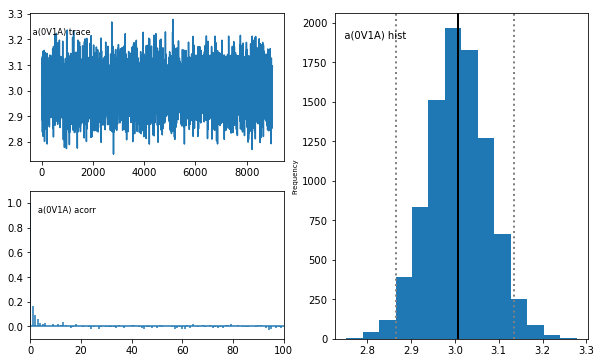

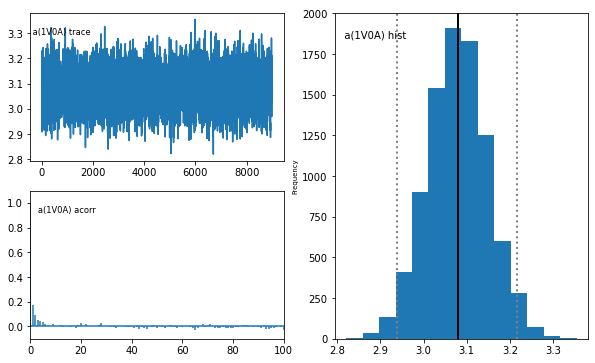

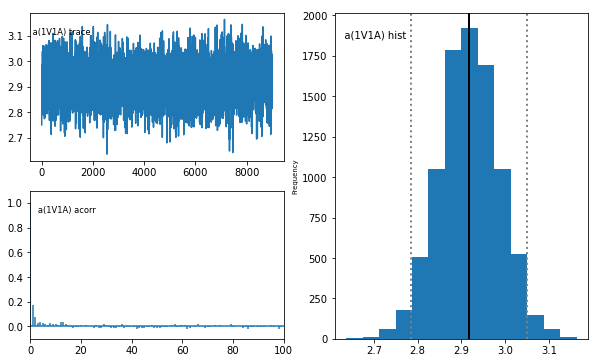

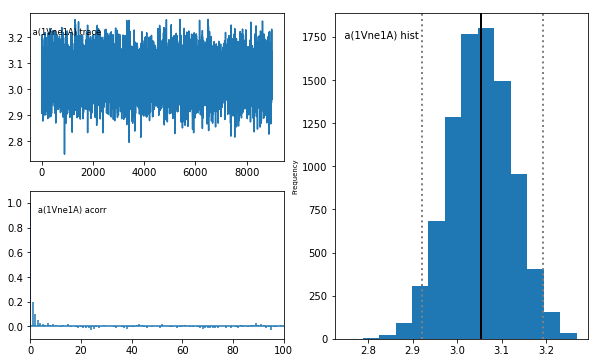

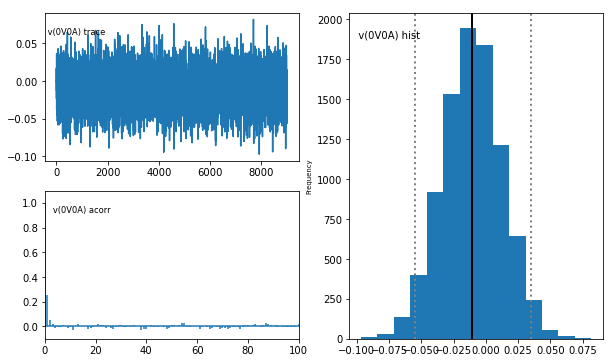

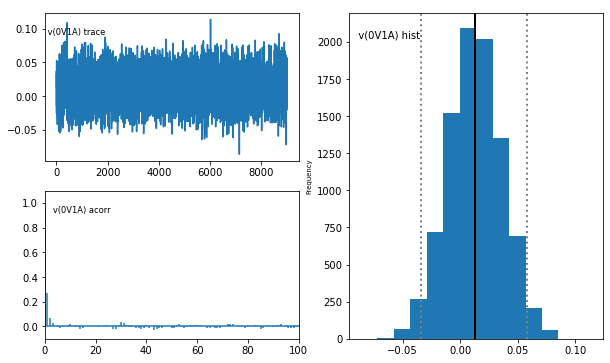

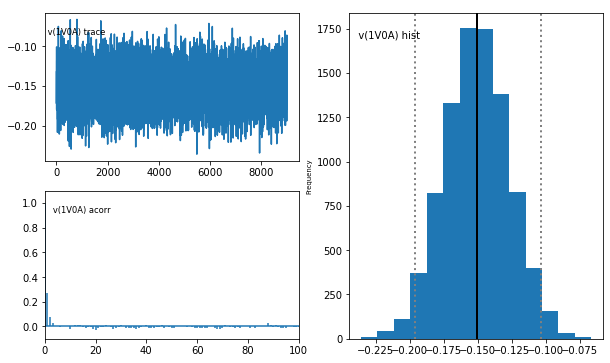

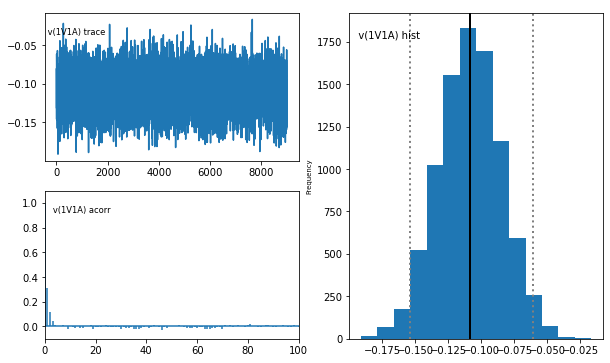

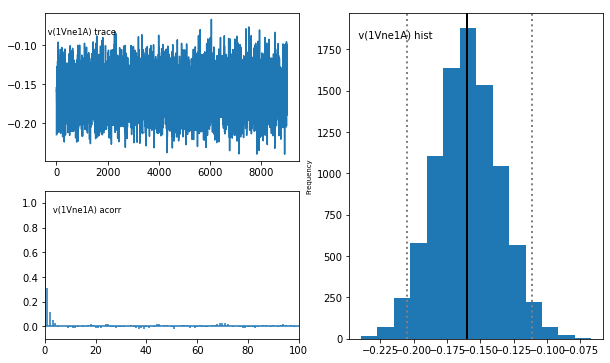

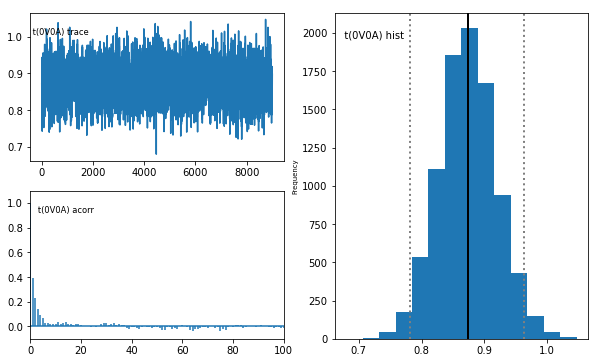

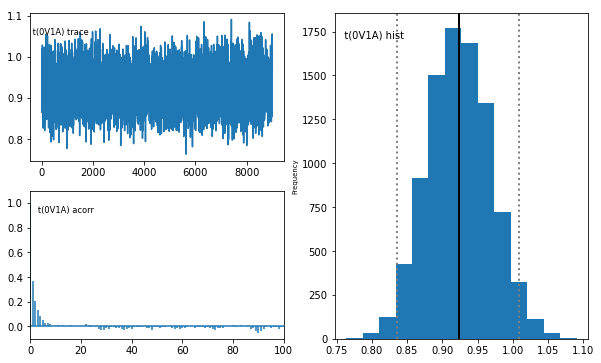

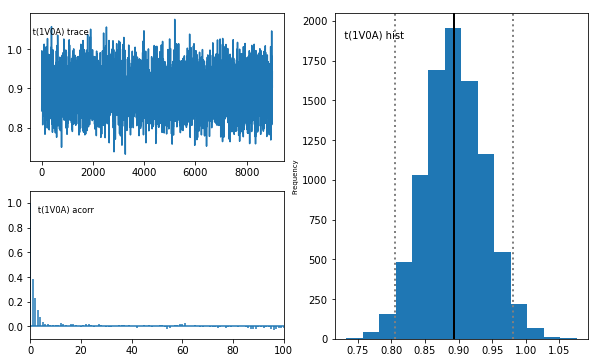

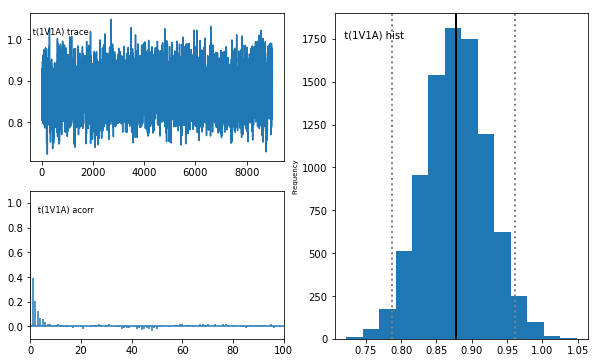

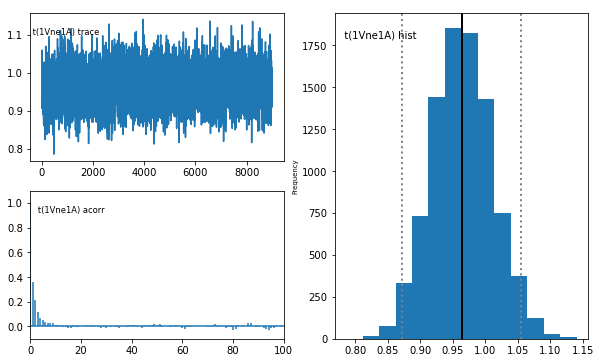

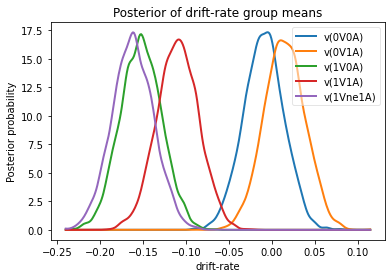

In [29]:
m.plot_posteriors(['a', 't', 'v'])
v_0V0A, v_0V1A, v_1V0A, v_1V1A, v_1Vne1A = m.nodes_db.node[['v(0V0A)', 'v(0V1A)', 'v(1V0A)', 'v(1V1A)', 'v(1Vne1A)']]
hddm.analyze.plot_posterior_nodes([v_0V0A, v_0V1A, v_1V0A, v_1V1A, v_1Vne1A])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

### getting stats from fitted model and save it as a csv file and then used for regression analysis in R

In [30]:
stats = m.gen_stats()

v_stats = stats[stats.index.str.match('v_subj')]
# v_stats.to_csv('~/OneDrive/projects/mood_management/data/summer/v_stats.csv', sep=',')

## plotting

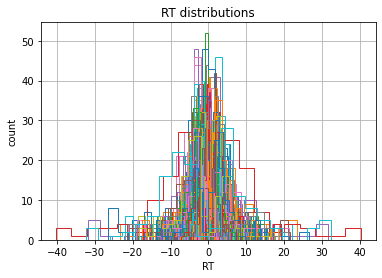

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

In [35]:
stats[stats.index.isin(['a(0V0A)', 'a(0V1A)', 'a(1V0A)', 'a(1V1A)', 'a(1Vne1A)',
                        't(0V0A)', 't(0V1A)', 't(1V0A)', 't(1V1A)', 't(1Vne1A)',
                        'v(0V0A)', 'v(0V1A)', 'v(1V0A)', 'v(1V1A)', 'v(1Vne1A)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(0V0A),3.12814,0.0685364,2.99513,3.08175,3.1287,3.17309,3.26355,0.000942986
a(0V1A),3.00814,0.068695,2.87177,2.963,3.00799,3.05351,3.14053,0.000955622
a(1V0A),3.07872,0.0700401,2.94062,3.03184,3.07949,3.12519,3.21685,0.00104179
a(1V1A),2.91772,0.0682152,2.78304,2.87273,2.91777,2.96378,3.04979,0.000961832
a(1Vne1A),3.0536,0.0697522,2.91666,3.00592,3.05463,3.10164,3.19004,0.000902221
v(0V0A),-0.0107127,0.0231848,-0.0560604,-0.0262525,-0.0104986,0.0048891,0.0342695,0.000277747
v(0V1A),0.0129388,0.0234823,-0.0333721,-0.0030685,0.0128183,0.0287036,0.0587303,0.000335027
v(1V0A),-0.150618,0.0236983,-0.196855,-0.166736,-0.150679,-0.134581,-0.103725,0.000281749
v(1V1A),-0.10864,0.0238705,-0.155728,-0.124671,-0.108523,-0.0925961,-0.0621306,0.000326333
v(1Vne1A),-0.159718,0.0238959,-0.206545,-0.175797,-0.159968,-0.143638,-0.112604,0.000357246


In [ ]:
models = []
for i in range(5):
    model = hddm.HDDM(data,depends_on={'v': 'stim',
                                                    'a': 'stim',
                                                    't': 'stim'}, p_outlier=.05)
    model.find_starting_values()
    model.sample(5000, burn=100)
    models.append(model)
hddm.analyze.gelman_rubin(models)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 5001 of 5000 complete in 25904.1 sec

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 5001 of 5000 complete in 24640.3 sec

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 5001 of 5000 complete in 24233.9 sec

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------76%--------          ] 3802 of 5000 complete in 18676.7 sec

### plotting fitted RT distribution and empirical RT distribution for each subject

In [ ]:
m_v = hddm.HDDM(data,depends_on={'v': 'stim'}, p_outlier=.05)
m_v.find_starting_values()
m_v.sample(10000, burn=1000)

In [ ]:
m_general = hddm.HDDM(data, p_outlier=.05)
m_general.find_starting_values()
m_general.sample(10000, burn=1000)

In [ ]:
model.plot_posterior_predictive()

In [ ]:
print("general model DIC: %f" % m.dic)
print("decision type model DIC: %f" % m_stim.dic)